# Part B - Question 6

**Supervised Learning Algorithms - Decision Trees:** Implement decision trees considering a data set of your choice. Create an ID3 Decision Tree. Implement the ID3 algorithm on your own. Use a pre-defined sklearn library for both Entropy-Information Gain as well as Gini Index calculation. Compare the results you got between your hand-coded algorithm and sklearn. Draw the decision tree. Write the interference on the choice of the root node, the internal nodes and the leaf nodes. Also calculate the Decision Tree model measurement metrics such as confusion matrix, accuracy, precision, recall, sensitivity, specificity, MCC etc.Write the inference. 

## Pre-processing

In [15]:
import pandas as pd

In [34]:
df=pd.read_csv('weather.csv')
df.head(15)

,id,outlook,temperature,humidity,wind,play
0,1,sunny,hot,high,weak,no
1,2,sunny,hot,high,strong,no
2,3,overcast,hot,high,weak,yes
3,4,rainy,mild,high,weak,yes
4,5,rainy,cool,normal,weak,yes
5,6,rainy,cool,normal,strong,no
6,7,overcast,cool,normal,strong,yes
7,8,sunny,mild,high,weak,no
8,9,sunny,cool,normal,weak,yes
9,10,rainy,mild,normal,weak,yes


In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df=df.apply(encoder.fit_transform)
df.head()

,id,outlook,temperature,humidity,wind,play
0,0,2,1,0,1,0
1,1,2,1,0,0,0
2,2,0,1,0,1,1
3,3,1,2,0,1,1
4,4,1,0,1,1,1


In [5]:
X  = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()

## Inbuilt Funtions

In [6]:
from sklearn.tree import DecisionTreeClassifier
cart=DecisionTreeClassifier(criterion='gini',max_depth=2)
id3=DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [7]:
cart.fit(X,Y)
id3.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [9]:
cart_pred = cart.predict(X)
id3_pred = id3.predict(X)

In [10]:
from sklearn.metrics import confusion_matrix
cm_cart = confusion_matrix(Y,cart_pred)
cm_id3 = confusion_matrix(Y,id3_pred)

In [12]:
print(cm_cart,"\n",cm_id3)

[[3 2]
 [0 9]] 
 [[3 2]
 [0 9]]


[Text(0.4, 0.8333333333333334, 'x[0] <= 1.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.5, 'x[0] <= 12.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

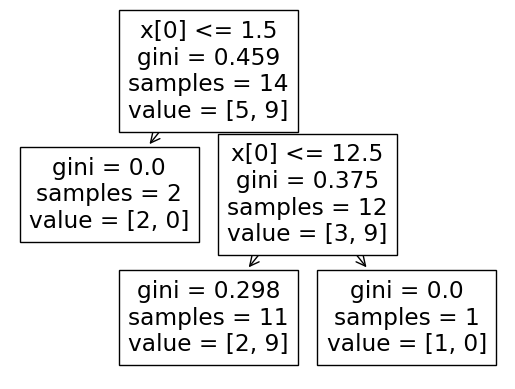

In [13]:
from sklearn import tree
tree.plot_tree(cart)

[Text(0.4, 0.8333333333333334, 'x[0] <= 1.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.5, 'x[0] <= 12.5\nentropy = 0.811\nsamples = 12\nvalue = [3, 9]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.684\nsamples = 11\nvalue = [2, 9]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

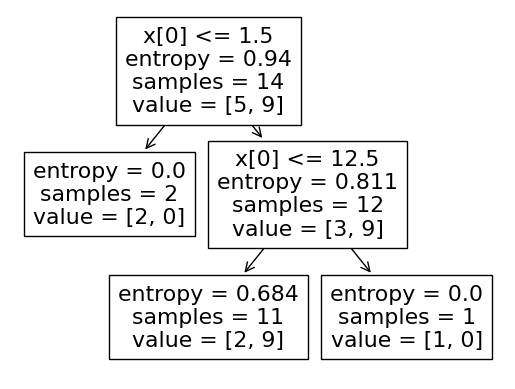

In [14]:
tree.plot_tree(id3)